### Problem Statement:
- **To predict house prices based on various features such as the number of bedrooms, bathrooms, square footage, location, and other relevant attributes. The goal is to train a machine learning model that can accurately estimate house prices and assist in property valuation.**

In [1]:
### Importing all the essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [2]:
df = pd.read_csv('BHP.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Features Information:
- **area_type:** Type of area in which houses are build.
- **availability:** whether its available/ ready to move in tha house or not.
- **location:** Location of of the houses.
- **size:** size of houses
- **society:** society in which houses are build
- **total_sqft:** Total sqft in which house are build
- **bath:** how many bathrooms are there in house.
- **balcony:** how many balcony are there in house.
- **price:** Price of house in lakhs.

**Understanding the datase**

In [3]:
df.shape

(13320, 9)

- This dataset contains 13320 rows and 9 columns

In [4]:
### Gives datatypes of features 
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
### Gives all columns name
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
### Gives all information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
### Checking for duplicates values
df.duplicated().sum()

529

In [8]:
### Dropping the duplicates values
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(12791, 9)

In [10]:
### Checking for missing values
df.isnull().sum()/len(df)*100

area_type        0.000000
availability     0.000000
location         0.007818
size             0.125088
society         41.654288
total_sqft       0.000000
bath             0.570714
balcony          4.729888
price            0.000000
dtype: float64

- We can see that the society columns is having missing values about 41% so we will drop this column.
- Others columns having some missing values so will just drop them.

In [11]:
df.drop('society', axis=1, inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
print(df.shape)
print('-----------------')
df.isnull().sum()

(12185, 8)
-----------------


area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [14]:
df['area_type'].value_counts(normalize=True)*100

Super built-up  Area    65.752975
Built-up  Area          18.793599
Plot  Area              14.780468
Carpet  Area             0.672959
Name: area_type, dtype: float64

In [15]:
df['availability'].value_counts(normalize=True)*100

Ready To Move    79.368076
18-May            2.289700
18-Dec            2.199426
18-Apr            2.125564
18-Aug            1.534674
                   ...    
16-Nov            0.008207
14-Nov            0.008207
16-Jan            0.008207
17-Feb            0.008207
14-Jul            0.008207
Name: availability, Length: 78, dtype: float64

- About 80% houses are ready to move.
- There are total 78 small values for avialibilty, which are not going to help in model analysis, so we will drop it.

In [16]:
df['location'].value_counts(normalize=True)*100

Whitefield            4.078785
Sarjapur  Road        2.888798
Electronic City       2.338941
Kanakpura Road        1.953221
Thanisandra           1.854739
                        ...   
Milk Colony           0.008207
Jaladarsini Layout    0.008207
Sundara Nagar         0.008207
Madanayakahalli       0.008207
Abshot Layout         0.008207
Name: location, Length: 1265, dtype: float64

In [17]:
df['size'].value_counts(normalize=True)*100

2 BHK         40.082068
3 BHK         32.334838
4 Bedroom      6.130488
3 Bedroom      4.226508
1 BHK          4.210094
4 BHK          3.890029
2 Bedroom      2.568732
5 Bedroom      2.109151
6 Bedroom      1.386951
1 Bedroom      0.853508
7 Bedroom      0.558063
8 Bedroom      0.533443
5 BHK          0.295445
9 Bedroom      0.237998
6 BHK          0.188757
7 BHK          0.131309
1 RK           0.106689
9 BHK          0.041034
8 BHK          0.024620
10 Bedroom     0.024620
11 Bedroom     0.016414
11 BHK         0.008207
27 BHK         0.008207
43 Bedroom     0.008207
14 BHK         0.008207
12 Bedroom     0.008207
13 BHK         0.008207
Name: size, dtype: float64

- About 40% houses are 2bhk and 32% are 2 bhk.

In [18]:
df['total_sqft'].value_counts(normalize=True)*100

1200    6.179729
1100    1.698810
1500    1.600328
2400    1.452606
600     1.395158
          ...   
2155    0.008207
555     0.008207
4830    0.008207
2383    0.008207
4689    0.008207
Name: total_sqft, Length: 1976, dtype: float64

- About 6% of houses are build-up in 1200 sqft of area.

In [19]:
df['bath'].value_counts(normalize=True)*100

2.0     53.114485
3.0     24.965121
4.0      8.863357
1.0      6.237177
5.0      3.504309
6.0      1.986048
7.0      0.672959
8.0      0.344686
9.0      0.213377
10.0     0.049241
27.0     0.008207
11.0     0.008207
12.0     0.008207
40.0     0.008207
15.0     0.008207
13.0     0.008207
Name: bath, dtype: float64

- About 53% of houses have 2 bathrooms, and 24% have 3 bathrooms.

In [20]:
df['balcony'].value_counts(normalize=True)*100

2.0    39.762002
1.0    38.572015
3.0    13.377103
0.0     8.288880
Name: balcony, dtype: float64

- About 40% houses have 3 bolconies and 8% of houses didn't have any bolcony.

In [21]:
## gives statsticals sumaary of dataset.
df.describe()

,bath,balcony,price
count,12185.000000,12185.000000,12185.000000
mean,2.631022,1.582273,107.631297
std,1.240363,0.822561,134.022372
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


- The size features containing two terms 'bhk and bedrooms',and both are same so we will only extract 1st value from it.

In [22]:
df['size'].str.get(0)

0        2
1        4
2        3
3        3
4        2
        ..
13312    2
13314    3
13315    5
13317    2
13318    4
Name: size, Length: 12185, dtype: object

In [23]:
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [24]:
df.drop('size', axis=1, inplace=True)

In [25]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12185 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12185 non-null  object 
 1   availability  12185 non-null  object 
 2   location      12185 non-null  object 
 3   total_sqft    12185 non-null  object 
 4   bath          12185 non-null  float64
 5   balcony       12185 non-null  float64
 6   price         12185 non-null  float64
 7   BHK           12185 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 856.8+ KB


In [27]:
df[df['BHK']>20]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,2400,40.0,0.0,660.0,43


In [28]:
## practically,there can't be 43 BHK in 2400 sqft of area

In [29]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

- in total_sqft column we are having some values as a range , so we will convert range of values into single value by calculating its mean

In [30]:
def convert_range_to_single(x):
    temp = x.split('-')
    
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

convert_range_to_single('1133 - 1384')

1258.5

In [31]:
df['total_sqft'] = df['total_sqft'].apply(convert_range_to_single)

In [32]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [33]:
df['location'].value_counts()

Whitefield            497
Sarjapur  Road        352
Electronic City       285
Kanakpura Road        238
Thanisandra           226
                     ... 
Milk Colony             1
Jaladarsini Layout      1
Sundara Nagar           1
Madanayakahalli         1
Abshot Layout           1
Name: location, Length: 1265, dtype: int64

In [34]:
## There are total of 1265 locations and out of these some of them containing spaces to its left and right,
# so we will remove that spaces

df['location'] = df['location'].apply(lambda x: x.strip())
df['location'].value_counts()

Whitefield                 498
Sarjapur  Road             352
Electronic City            287
Kanakpura Road             238
Thanisandra                229
                          ... 
Jayamahal Extension          1
Hallehalli                   1
Nagarbhavi  BDA Complex      1
Rajanna Layout               1
Abshot Layout                1
Name: location, Length: 1254, dtype: int64

In [35]:
### Now we have got 1254 different locations

In [36]:
## Location of houses which are 10 appears 10 or less than 10 times

locations = df['location'].value_counts()
locations_Less_than_10 = locations[locations<= 10]
locations_Less_than_10

Dairy Circle               10
Vasanthapura               10
Ganga Nagar                10
HAL 2nd Stage              10
Naganathapura              10
                           ..
Jayamahal Extension         1
Hallehalli                  1
Nagarbhavi  BDA Complex     1
Rajanna Layout              1
Abshot Layout               1
Name: location, Length: 1027, dtype: int64

In [37]:
### Applying lambda fun on location, replacing the location which appears 20 or less than 20 times with 'others'
# and remaing will be same

df['location'] = df['location'].apply(lambda x: 'Other' if x in locations_Less_than_10 else x)

In [38]:
## Now we have 134 diffrent locations
df['location'].value_counts()

Other                   2806
Whitefield               498
Sarjapur  Road           352
Electronic City          287
Kanakpura Road           238
                        ... 
Prithvi Layout            11
Vishveshwarya Layout      11
Karuna Nagar              11
LB Shastri Nagar          11
Nagasandra                11
Name: location, Length: 228, dtype: int64

In [39]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [40]:
df['availability_to_move'] = df['availability'].apply(lambda x: 'Yes' if x == 'Ready To Move' else 'No')

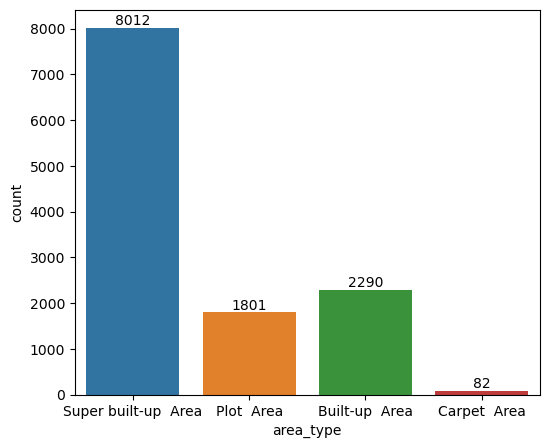

In [41]:
plt.figure(figsize=(6,5))
ax = sns.countplot(df['area_type'])
for label in ax.containers:
    ax.bar_label(label);

**Observation:** about 65% of houses are in superbuilt-up area and very few are in carpet area.

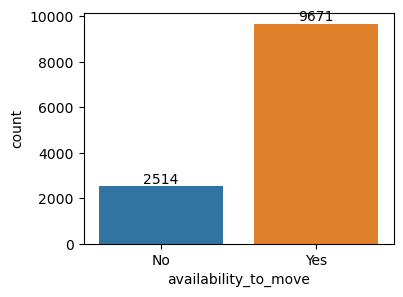

In [42]:
plt.figure(figsize=(4,3))
ax = sns.countplot(df['availability_to_move'])
for label in ax.containers:
    ax.bar_label(label);

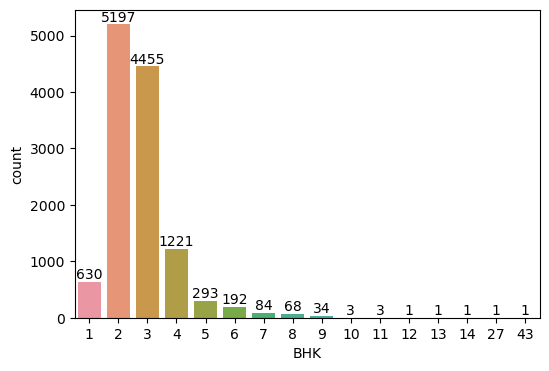

In [43]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df['BHK'])
for label in ax.containers:
    ax.bar_label(label);

**Observations:** We can see that most of the houses are 2BHK and 3BHK and there are very few which is more than 6BHK.

In [44]:
df['bath'] = df['bath'].astype(int)
df['balcony'] = df['balcony'].astype(int)

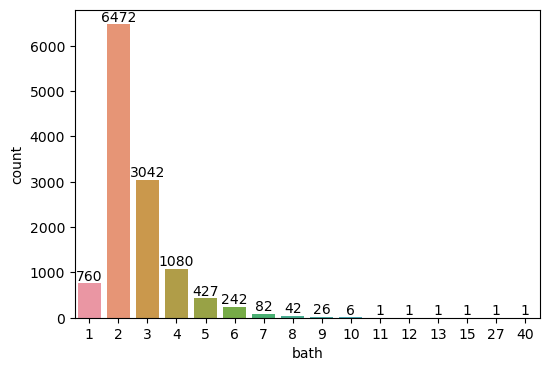

In [45]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df['bath'])
for label in ax.containers:
    ax.bar_label(label);

In [46]:
df['balcony'].value_counts(normalize=True)

2    0.397620
1    0.385720
3    0.133771
0    0.082889
Name: balcony, dtype: float64

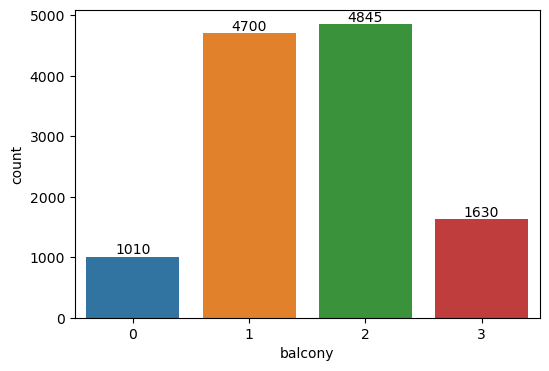

In [47]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df['balcony'])
for label in ax.containers:
    ax.bar_label(label);

**Observations:** Most of the houses containg 1 and 2 balcony, and about 8% of houses don't have any bolcony.

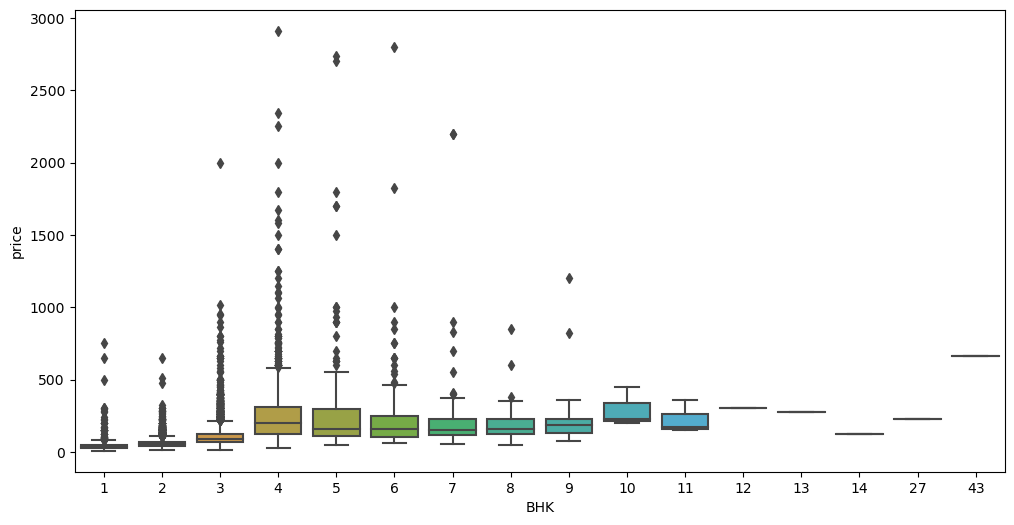

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x= 'BHK', y='price', data= df);

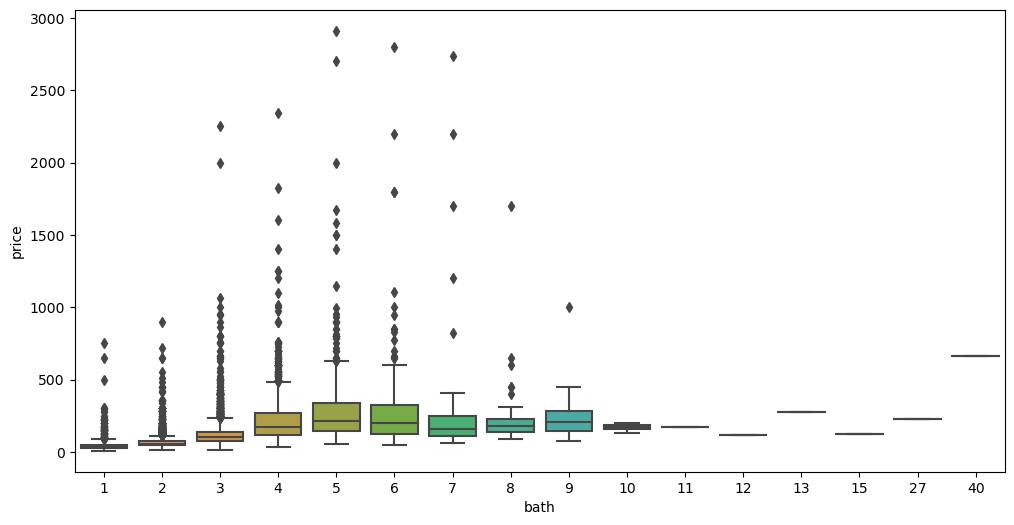

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(x= 'bath', y='price', data= df);

In [50]:
df.describe()

,total_sqft,bath,balcony,price,BHK
count,12143.000000,12185.000000,12185.000000,12185.000000,12185.000000
mean,1520.562387,2.631022,1.582273,107.631297,2.749282
std,1183.122889,1.240363,0.822561,134.022372,1.220753
min,5.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1265.000000,2.000000,2.000000,70.000000,3.000000
75%,1650.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


- Here we can see that for  min area required to build-up a house is 5 sqft which is practically not possible.

In [51]:
### to know the area required for per bhk in sqft

(df['total_sqft']/df['BHK']).describe()

count    12143.000000
mean       571.209914
std        387.778724
min          0.714286
25%        473.333333
50%        550.000000
75%        623.333333
max      26136.000000
dtype: float64

**Observations:** We can see that, min area(sqft) required for 1 BHK is 0.71 sqft which is not feasible, so will will remove the rows which contains total_area to build-up a house less than 300 sqft.

In [52]:
df = df[((df['total_sqft']/df['BHK'])>=300)]
df.describe()

,total_sqft,bath,balcony,price,BHK
count,11498.000000,11498.000000,11498.000000,11498.000000,11498.000000
mean,1552.483046,2.522613,1.586189,106.684092,2.615846
std,1203.150404,1.017145,0.814386,136.662807,0.933568
min,300.000000,1.000000,0.000000,9.000000,1.000000
25%,1105.000000,2.000000,1.000000,49.000000,2.000000
50%,1294.500000,2.000000,2.000000,69.140000,2.000000
75%,1680.000000,3.000000,2.000000,112.000000,3.000000
max,52272.000000,13.000000,3.000000,2912.000000,13.000000


In [53]:
df.shape

(11498, 9)

In [54]:
### To get the price for a sqft

df['price_per_sqft'] = (df['price']/df['total_sqft'])*100000

In [55]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,availability_to_move,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2,1,39.07,2,No,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5,3,120.00,4,Yes,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2,3,62.00,3,Yes,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3,1,95.00,3,Yes,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2,1,51.00,2,Yes,4250.000000


In [56]:
df['price_per_sqft'].describe()

count     11498.000000
mean       6263.708278
std        4048.606167
min         267.829813
25%        4226.921275
50%        5290.820191
75%        6875.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

- We can see that min price per sqft is 267 and maximum price per sqft is 176470 which shows a huge variation b/w the prices per sqft, so we need to treat the outliers.

Skewness: 9.747404630800572
--------------------------------------------------


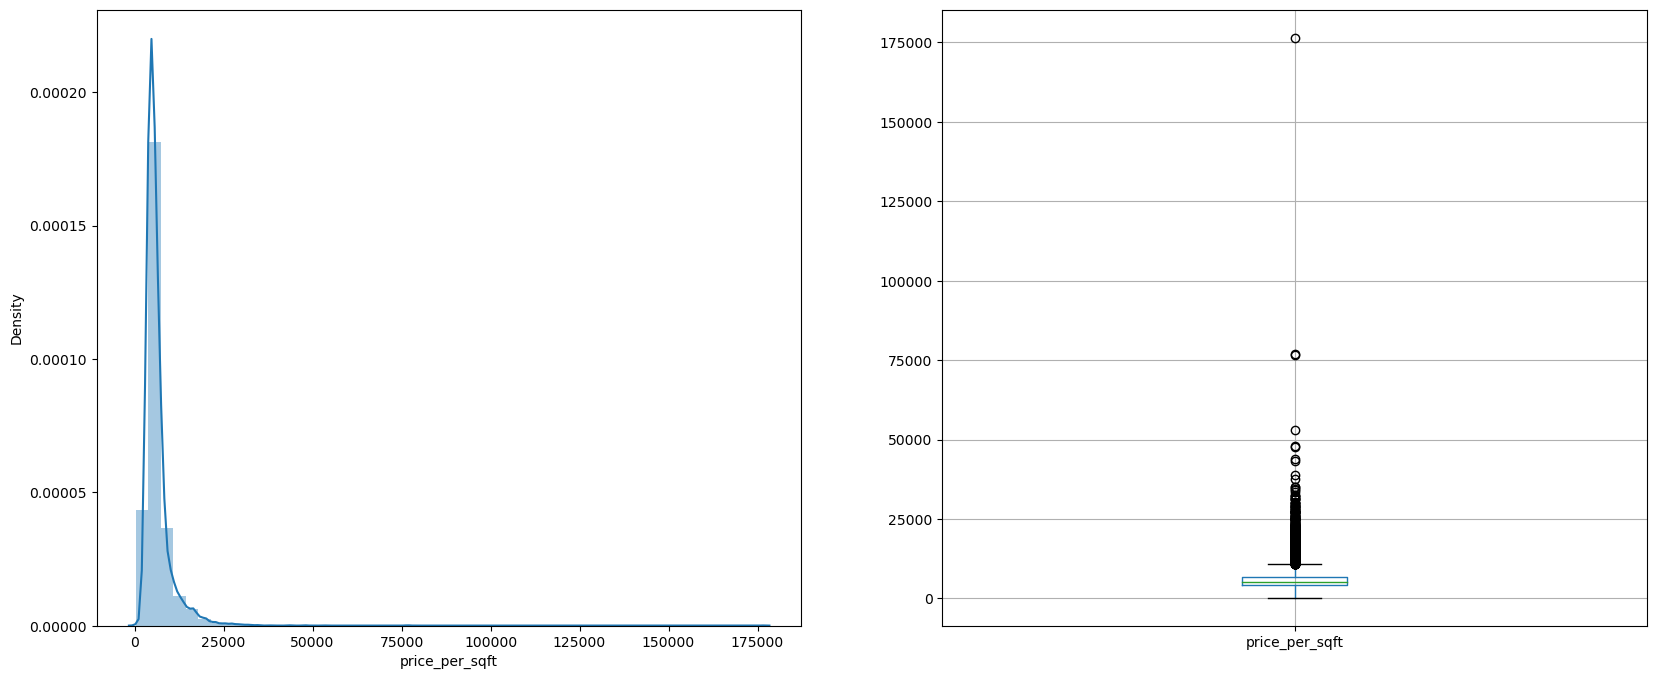

In [57]:
print('Skewness:', df['price_per_sqft'].skew())
print('-'*50)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['price_per_sqft'], kde=True)

plt.subplot(1,2,2)
figure = df.boxplot(column = 'price_per_sqft');

In [58]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df_new = remove_pps_outliers(df)
df_new.shape

(9433, 10)

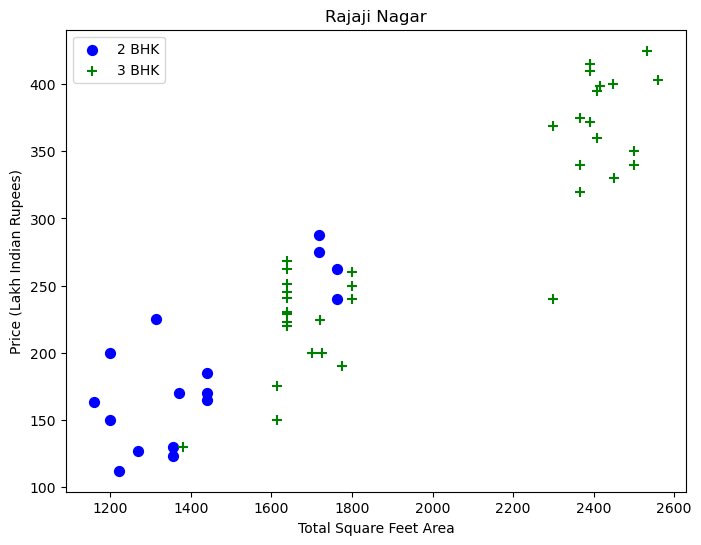

In [59]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(8,6))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df_new,"Rajaji Nagar")

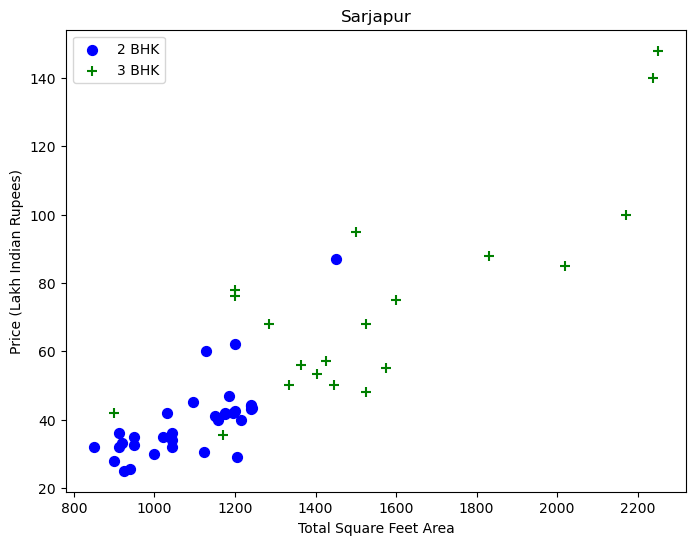

In [60]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(8,6))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df_new,"Sarjapur")

- **Observations:** We can see that price for 2BHk is more than 3BHk in same locations, which didn't seems appropriate , so we will remove those 2BHKs whose price is more than 3BHKs at the same locations.

In [61]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df_new = remove_bhk_outliers(df_new)
df_new.shape

(6688, 10)

In [62]:
df_new[df_new.bath>8]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,availability_to_move,price_per_sqft
3364,Built-up Area,18-Feb,KR Puram,4600.0,9,2,200.0,9,No,4347.826087
4600,Super built-up Area,Ready To Move,Mico Layout,5000.0,9,3,210.0,9,Yes,4200.000000
4918,Super built-up Area,Ready To Move,Other,5000.0,9,3,360.0,11,Yes,7200.000000
5298,Super built-up Area,Ready To Move,Other,11338.0,9,1,1000.0,6,Yes,8819.897689
6512,Super built-up Area,Ready To Move,Other,5425.0,13,0,275.0,13,Yes,5069.124424
7323,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,3600.0,9,3,240.0,9,Yes,6666.666667


In [63]:
df_new[df_new.bath > df_new.BHK+2]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,availability_to_move,price_per_sqft
1433,Built-up Area,Ready To Move,Chikkabanavar,2460.0,7,2,80.0,4,Yes,3252.032520
5298,Super built-up Area,Ready To Move,Other,11338.0,9,1,1000.0,6,Yes,8819.897689
8311,Super built-up Area,Ready To Move,Thanisandra,1806.0,6,2,116.0,3,Yes,6423.034330


- We can see that some of the houses having bathrooms more than the BHK

In [64]:
df_new = df_new[df_new.bath < df_new.BHK+2]
df_new.shape

(6620, 10)

In [65]:
df_new.drop(['availability','availability_to_move', 'price_per_sqft','area_type', 'balcony'], axis=1, inplace=True)

In [66]:
df_new.shape

(6620, 5)

In [67]:
df_new.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2


In [68]:
X = df_new.drop('price', axis=1)
y = df_new['price']

In [69]:
X = pd.get_dummies(X, drop_first=True)

In [70]:
print(X.shape, y.shape)

(6620, 230) (6620,)


In [71]:
X

,total_sqft,bath,BHK,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,672.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9425,1692.0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9427,2500.0,5,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9431,1855.0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
##Importing the models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [73]:
#Splitting the dataset into train and test samples.
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape)

(5296, 230) (1324, 230)


In [74]:
###Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
##Creating a function to calculate best model for this problem
def find_best_model(X,y):
    models = {'linear_regression':{'model':LinearRegression(), 'parameters':{'normalize':[True, False]}},
             
              'lasso':{'model':Lasso(), 'parameters':{'alpha':[1,2],'selection':['random','cyclic']}},
              
              'elastic_net':{'model':ElasticNet(),'parameters':{'alpha':[0.1,0.2,1,2,3,5,10],'l1_ratio':[0.1,0.5,0.75,0.9,0.95,1]}},
             
             'decision_tree':{'model':DecisionTreeRegressor(random_state=0), 'parameters':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}},
             
             'random_forest':{'model':RandomForestRegressor(random_state=0), 'parameters':{'n_estimators':[5,10,15,20],'criterion':['mse','friedman_mse']}},
             'xgb_reg':{'model':XGBRegressor(), 'parameters':{'n_estimators': [20,50,100],'learning_rate': [0.05,0.1,0.5]}}}
    
    
    scores = []
    for model_name, model_params in models.items():
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({'model': model_name,'best_parameters':gs.best_params_, 'score':gs.best_score_})
    return pd.DataFrame(scores, columns=['model','best_parameters', 'score'])

find_best_model(X,y)

,model,best_parameters,score
0,linear_regression,{'normalize': False},0.828438
1,lasso,"{'alpha': 1, 'selection': 'cyclic'}",0.718026
2,elastic_net,"{'alpha': 0.1, 'l1_ratio': 1}",0.795406
3,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.748088
4,random_forest,"{'criterion': 'friedman_mse', 'n_estimators': 15}",0.760282
5,xgb_reg,"{'learning_rate': 0.5, 'n_estimators': 100}",0.783213


In [76]:
# Creating linearregression Model
model = LinearRegression(normalize = False)
model.fit(X_train, y_train)

#prediction on X_train, X_test
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Score
print('Train R2-Score:', model.score(X_train, y_train))
print('Test R2-Score:', model.score(X_test, y_test))

test_RMSE = np.sqrt(mean_squared_error(y_test,ypred_test))
train_RMSE = np.sqrt(mean_squared_error(y_train, ypred_train))
print('RMSE-Train',train_RMSE)
print('RMSE-Test', test_RMSE)

Train R2-Score: 0.8419186296732776
Test R2-Score: 0.8482524866096652
RMSE-Train 32.923730511484194
RMSE-Test 26.78591646289282


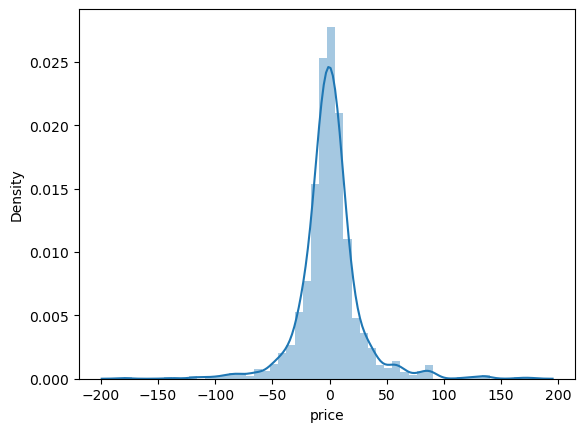

In [77]:
sns.distplot(y_test-ypred_test)
plt.show()

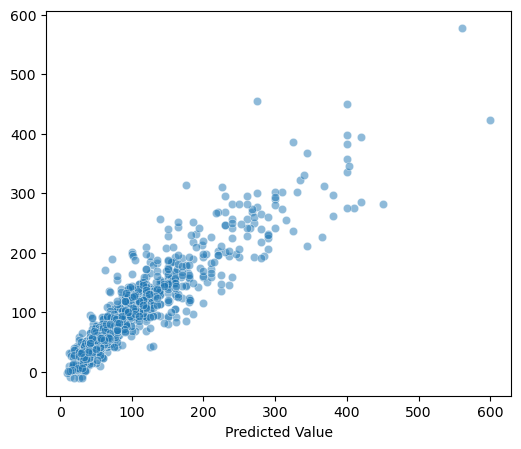

In [78]:
plt.figure(figsize=(6,5))
sns.scatterplot(y_test, ypred_test, alpha=0.5)
plt.xlabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [80]:
import pickle
#create a file, where we want to save the model
file = open('BHP_lr.pkl','wb')

#Dump the inforamtion to the file we created
pickle.dump(model, file)